# kmeans聚类及其变体在不同数据集上的表现对比

通过这个项目你会理解
1. 聚类和降维方法是什么？
2. 聚类的思想有哪些？

## 数据集介绍


scikit-learn 库中内置了一些常用的标准数据集。这些数据集被广泛用于教学、研究和算法测试。

In [1]:
from sklearn.datasets import load_iris, load_wine, load_digits
import pandas as pd

# 加载鸢尾花数据集
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 加载葡萄酒数据集
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# 加载手写数字数据集
digits = load_digits()
digits_df = pd.DataFrame(data=digits.data)
digits_df['target'] = digits.target

In [24]:
# 打印数据集
print("鸢尾花数据集：")
iris_df

鸢尾花数据集：


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Iris 鸢尾花数据集**

Iris 数据集是机器学习和统计学领域中最为著名的数据集之一。

- **数据集构成**：
    - 该数据集包含了 150 个样本。
    - 每个样本具有 4 个特征，具体如下：
        - 花萼长度（Sepal Length）
        - 花萼宽度（Sepal Width）
        - 花瓣长度（Petal Length）
        - 花瓣宽度（Petal Width）

- **样本分类**：
    - 数据集中的 150 个样本被划分为 3 个类别，每个类别包含 50 个样本。
    - 这 3 个类别分别代表三种鸢尾花：
        - Setosa
        - Versicolour
        - Virginica


In [25]:
print("葡萄酒数据集：")
wine_df

葡萄酒数据集：


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Wine 数据集

Wine 数据集包含 178 个样本，每个样本有 13 个特征，这些特征是从意大利同一地区的三种不同品种的葡萄酒中提取的化学成分。数据集用于分类这三种葡萄酒。

- **特征**：
  - 酒精（Alcohol）
  - 苹果酸（Malic acid）
  - 灰分（Ash）
  - 灰分的碱度（Alcalinity of ash）
  - 镁（Magnesium）
  - 总酚（Total phenols）
  - 黄酮类化合物（Flavanoids）
  - 非黄烷类酚类（Nonflavanoid phenols）
  - 原花青素（Proanthocyanins）
  - 色度（Color intensity）
  - 色调（Hue）
  - 稀释葡萄酒的 OD280/OD315 比例（OD280/OD315 of diluted wines）
  - 脯氨酸（Proline）
- **目标**：
  - 三种葡萄酒类别





In [26]:
print("手写数字数据集：")
digits_df

手写数字数据集：


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


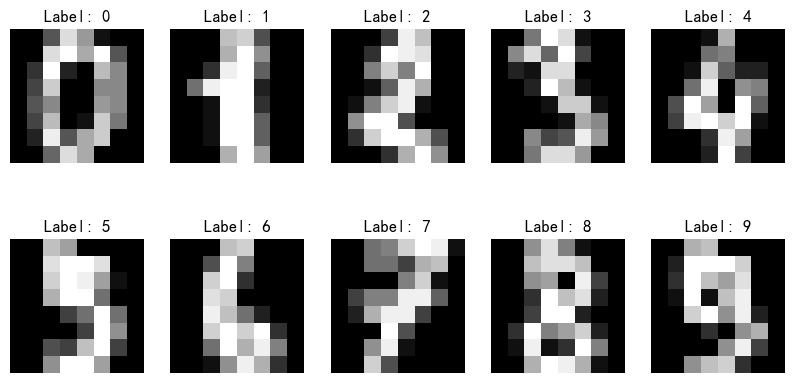

In [27]:
import matplotlib.pyplot as plt
# 显示前10个手写数字图像
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

plt.show()

Digits 数据集

Digits 数据集包含 1797 个样本，每个样本是一个 8x8 像素的手写数字图像。每个像素的值在 0 到 16 之间，表示灰度级。数据集用于手写数字识别任务。

- **特征**：
  - 64 个特征，每个特征表示一个像素的灰度值（8x8 像素图像）
- **目标**：
  - 10 个类别（数字 0 到 9）

通过二阶导数法得到的肘部对应的k值为: 2


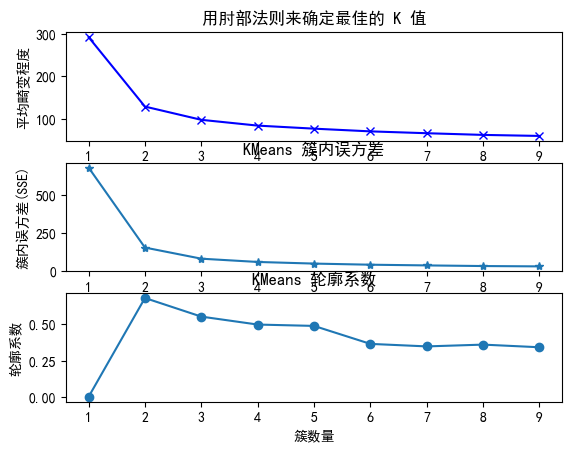

In [ ]:
# 使用 scikit-learn 实现 KMeans 聚类
# 导入必要的库
import numpy as np  # 导入 NumPy 库，用于数值计算
from sklearn.cluster import KMeans  # 从 scikit-learn 库中导入 KMeans 聚类算法
from sklearn.datasets import load_iris  # 从 scikit-learn 库中导入 load_iris 函数，用于加载鸢尾花数据集
from sklearn.manifold import TSNE  # 从 scikit-learn 库中导入 TSNE，用于降维
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于数据可视化
from scipy.spatial.distance import cdist  # 从 SciPy 库中导入 cdist 函数，用于计算距离
import warnings  # 导入 warnings 库，用于忽略警告
from sklearn.decomposition import PCA #导入pca
from sklearn import datasets, metrics

# 设置 Matplotlib 字体以避免字体缺失的警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 加载数据集
# 加载鸢尾花数据集
X = load_iris().data  # 加载鸢尾花数据集的特征数据
y_true = load_iris().target  # 加载鸢尾花数据集的目标标签

# 使用肘部法则确定最佳的 K 值
K = range(1, 10)  # 选择 K 的范围
meandistortions = []  # 存储每个 K 值对应的平均畸变程度
# 存放设置不同簇数时的SSE值
see_list = []
# 轮廓系数
silhouettes = []

for k in K:  # 遍历每个 K 值
    kmeans = KMeans(n_clusters=k)  # 初始化 KMeans 模型，设置聚类数为 k
    kmeans.fit(X)  # 训练 KMeans 模型
    centers = kmeans.cluster_centers_  # 获取聚类中心
    error = sum(np.min(cdist(X, centers, 'euclidean'), axis=1))  # 计算每个点到其最近聚类中心的距离，并求和
    meandistortions.append(error)  # 将误差添加到列表中
    see_list.append(kmeans.inertia_) # 将SSE添加到列表中
    # # 计算轮廓系数
    if(k>1):
        silhouette = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
        silhouettes.append(silhouette)
    else:
        silhouettes.append(0)

# 计算SSE关于k的一阶导数（近似）
diff_sse  = np.diff(see_list)
# 计算SSE关于k的二阶导数（近似）
second_diff_sse = np.diff(diff_sse)
# 找到二阶导数的极值点（这里简单找最大值对应的索引）
elbow_index = np.argmax(np.abs(second_diff_sse)) + 1
# 打印和绘制结果
print(f"通过二阶导数法得到的肘部对应的k值为: {elbow_index + 1}")


# 绘制肘部法则图
plt.subplot(311)
plt.plot(K, meandistortions, 'bx-')  # 绘制 K 值与平均畸变程度的关系图，使用蓝色的 'x' 标记点，并用线连接
plt.xlabel('k')  # 设置 x 轴标签为 'k'
plt.ylabel('平均畸变程度')  # 设置 y 轴标签为 '平均畸变程度'
plt.title('用肘部法则来确定最佳的 K 值')  # 设置图表标题为 '用肘部法则来确定最佳的 K 值'
plt.subplot(312)
plt.title('KMeans 簇内误方差')
plt.plot(K, see_list, marker='*')
plt.xlabel('簇数量')
plt.ylabel('簇内误方差(SSE)')
plt.subplot(313)
plt.title('KMeans 轮廓系数')
plt.plot(K, silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')


# plt.savefig("iris1.png", bbox_inches='tight')  # 保存图表为 'iris1.png' 文件，bbox_inches='tight' 表示紧凑布局
plt.show()  # 显示图表




我这里选择的是先降维在聚类，实际上2种都可以  原则上先降维后聚类可视化会好看点 不至于混在一起
n_components=2 表示维度为2 


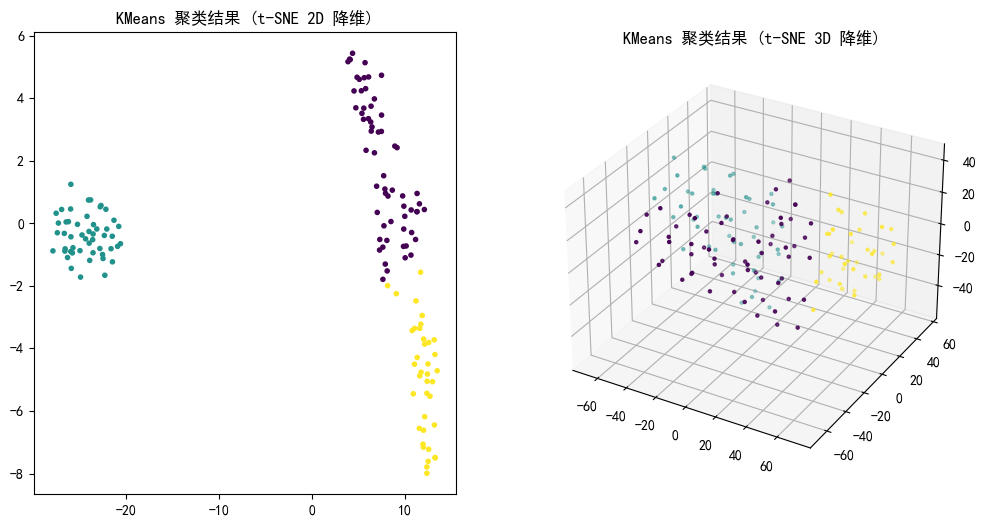

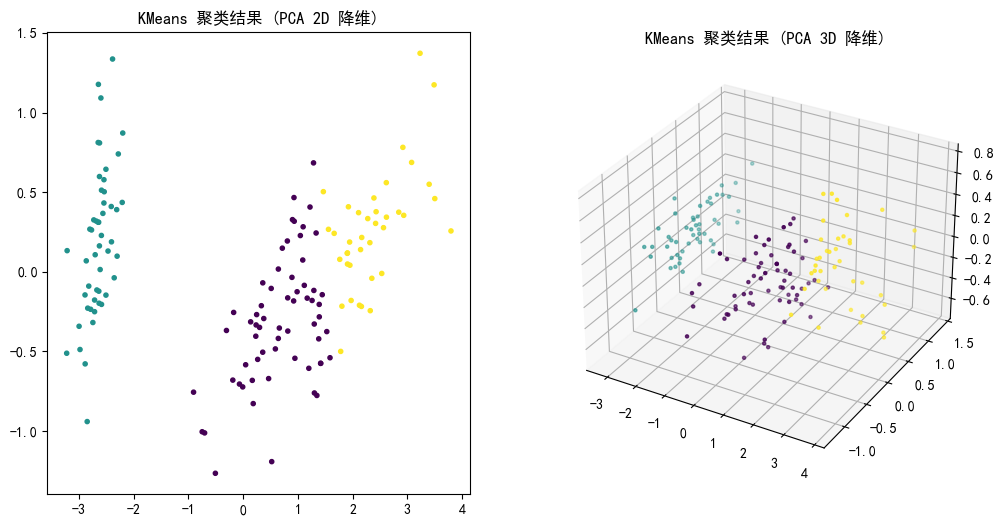

In [30]:
# 使用 t-SNE 进行降维，将数据降到二维和三维以便可视化
tsne_2d = TSNE(n_components=2, init='pca', random_state=0)  # 实例化 t-SNE 模型
X_tsne_2d = tsne_2d.fit_transform(X)  # 训练模型并返回降维后的数据

tsne_3d = TSNE(n_components=3, init='pca', random_state=0)  # 实例化 t-SNE 模型
X_tsne_3d = tsne_3d.fit_transform(X)  # 训练模型并返回降维后的数据

# 使用 PCA 进行降维，将数据降到二维和三维以便可视化
pca_2d = PCA(n_components=2)  # 实例化 PCA 模型
X_pca_2d = pca_2d.fit_transform(X)  # 训练模型并返回降维后的数据

pca_3d = PCA(n_components=3)  # 实例化 PCA 模型
X_pca_3d = pca_3d.fit_transform(X)  # 训练模型并返回降维后的数据

# 运行 K-Means 聚类并获取标签
# 假设通过肘部法则确定最佳的 K 值为 3，你可以根据实际情况修改
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# 可视化聚类结果 (t-SNE 降维)
fig = plt.figure(figsize=(12, 6))

# t-SNE 2D
ax1 = fig.add_subplot(121)
ax1.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=labels, cmap='viridis', marker='.')
ax1.set_title('KMeans 聚类结果 (t-SNE 2D 降维)')

# t-SNE 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=labels, cmap='viridis', marker='.')
ax2.set_title('KMeans 聚类结果 (t-SNE 3D 降维)')

# plt.savefig("iris_kmeans_tsne.png", bbox_inches='tight')
plt.show()

# 可视化聚类结果 (PCA 降维)
fig = plt.figure(figsize=(12, 6))

# PCA 2D
ax1 = fig.add_subplot(121)
ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', marker='.')
ax1.set_title('KMeans 聚类结果 (PCA 2D 降维)')

# PCA 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', marker='.')
ax2.set_title('KMeans 聚类结果 (PCA 3D 降维)')

# plt.savefig("iris_kmeans_pca.png", bbox_inches='tight')
plt.show()

In [ ]:
# 分离特征数据和标签数据
X = data.drop(['count'], axis=1)  # 特征数据
y = data['count']  # 标签数据

鸢尾花本身也有三类，如果这三类就是真实的三类，其实说明了特征是不存在权重差异的，这也不符合逻辑，每个特征不可能平等。

所以拿有监督模型和无监督模型作对比，意义其实不大。

通过二阶导数法得到的肘部对应的k值为: 2


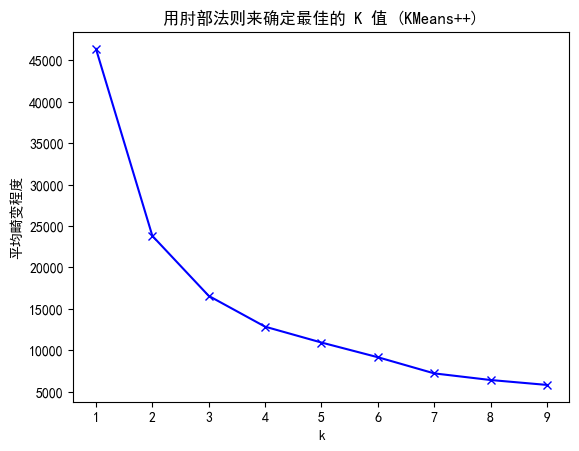

In [24]:
# 使用 scikit-learn 实现 KMeans++ 聚类
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
# 设置 Matplotlib 字体以避免字体缺失的警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 加载数据集
X = load_wine().data
y_true = load_wine().target

# 降维
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

# 使用肘部法则确定最佳的 K 值
K = range(1, 10)
meandistortions = []
see_list=[]

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    error = sum(np.min(cdist(X, centers, 'euclidean'), axis=1)) # 计算每个点到其最近聚类中心的距离，并求和
    meandistortions.append(error)
    see_list.append(kmeans.inertia_) # 将SSE添加到列表中

# 计算SSE关于k的一阶导数（近似）
diff_sse  = np.diff(see_list)
# 计算SSE关于k的二阶导数（近似）
second_diff_sse = np.diff(diff_sse)
# 找到二阶导数的极值点（这里简单找最大值对应的索引）
elbow_index = np.argmax(np.abs(second_diff_sse)) + 1
# 打印和绘制结果
print(f"通过二阶导数法得到的肘部对应的k值为: {elbow_index + 1}")


# 绘制肘部法则图
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('平均畸变程度')
plt.title('用肘部法则来确定最佳的 K 值 (KMeans++)')
# plt.savefig("iris_kmeans_plus_plus.png", bbox_inches='tight')
plt.show()

1 : 34.48010133733741
2 : 32.593075793120256
3 : 30.71681796918723
4 : 29.745778171188384
5 : 28.72861527233937
6 : 28.08659194437728
7 : 27.513074536106274
8 : 26.17365072324928
9 : 25.632834780672834
10 : 24.934632455396496
11 : 24.80568024232947
12 : 24.679622894030526
13 : 24.37185073416209
14 : 24.107502113323932
15 : 23.73716979031684
16 : 23.440893639664196
17 : 23.472107410412136
18 : 23.07327844401538
19 : 23.096997696023756
//n
1 : 2159478.1599130207
2 : 1942532.2260433012
3 : 1732075.8869319933
4 : 1630885.098418691
5 : 1523109.9644051997
6 : 1460387.0994814944
7 : 1394664.6490292489
8 : 1291324.3667182392
9 : 1236027.57498644
10 : 1169566.204117065
11 : 1158012.1183971274
12 : 1146468.7580643832
13 : 1122864.7234077437
14 : 1088675.929772663
15 : 1063508.1411788142
16 : 1032643.8559932712
17 : 1046422.4357467039
18 : 1002127.7716091732
19 : 1003880.7856369124
通过二阶导数法得到的肘部对应的k值为: 3


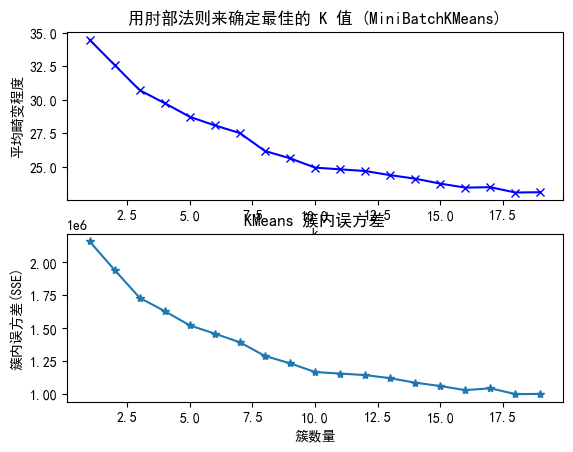

In [23]:
# 使用 scikit-learn 实现 MiniBatchKMeans 聚类
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 加载数据集
X = load_digits().data
y_true = load_digits().target

# 降维
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

# 使用肘部法则确定最佳的 K 值
K = range(1, 20)
meandistortions = []
see_list = []
mapping1 = {}
mapping2 = {}


for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=10, batch_size=100, random_state=0)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    error = sum(np.min(cdist(X, centers, 'euclidean'), axis=1)/X.shape[0])
    meandistortions.append(error)
    see_list.append(kmeans.inertia_) # 将SSE添加到列表中
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

print('//n')

for key, val in mapping2.items():
    print(f'{key} : {val}')

# 计算SSE关于k的一阶导数（近似）
diff_sse  = np.diff(see_list)
# 计算SSE关于k的二阶导数（近似）
second_diff_sse = np.diff(diff_sse)
# 找到二阶导数的极值点（这里简单找最大值对应的索引）
elbow_index = np.argmax(np.abs(second_diff_sse)) + 1
# 打印和绘制结果
print(f"通过二阶导数法得到的肘部对应的k值为: {elbow_index + 1}")


# 设置 Matplotlib 字体以避免字体缺失的警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 绘制肘部法则图
plt.subplot(211)
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('平均畸变程度')
plt.title('用肘部法则来确定最佳的 K 值 (MiniBatchKMeans)')
# plt.savefig("iris_minibatch_kmeans.png", bbox_inches='tight')
plt.subplot(212)
plt.title('KMeans 簇内误方差')
plt.plot(K, see_list, marker='*')
plt.xlabel('簇数量')
plt.ylabel('簇内误方差(SSE)')
plt.show()

dataset=iris model=KMeans takeTime=0.04566
dataset=iris model=KMeans++ takeTime=0.04276
dataset=iris model=MiniBatchKMeans takeTime=0.19931


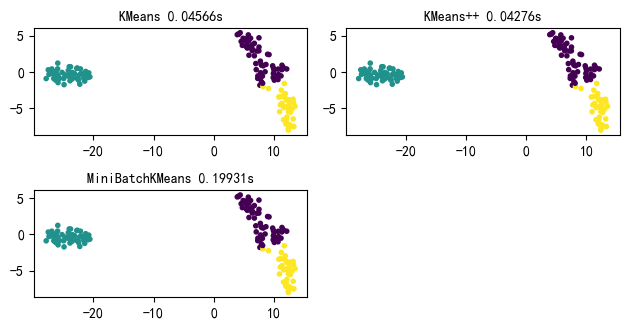

dataset=digits model=KMeans takeTime=0.15497
dataset=digits model=KMeans++ takeTime=0.1438
dataset=digits model=MiniBatchKMeans takeTime=0.18442


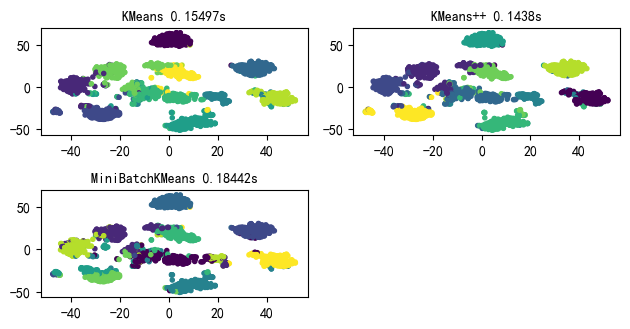

dataset=wine model=KMeans takeTime=0.05807
dataset=wine model=KMeans++ takeTime=0.0486
dataset=wine model=MiniBatchKMeans takeTime=0.11204


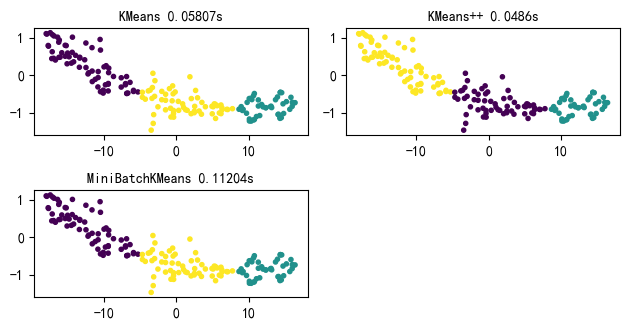

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris, load_digits
from sklearn.manifold import TSNE
import warnings

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

allData = {"iris": load_iris().data, "digits": load_digits().data,"wine": load_wine().data}
models = {"KMeans": KMeans, "KMeans++": KMeans, "MiniBatchKMeans": MiniBatchKMeans}

for dataName, value in allData.items():
    subplot_counter = 0
    n_clusters = 3
    if dataName == "digits":
        n_clusters = 10

    if dataName == "wine":
        n_clusters = 3

    # 降维
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(value)

    for modelName, model in models.items():
        startTime = time.time()
        if modelName == "KMeans++":
            init = "k-means++"
            model = model(n_clusters=n_clusters, init=init, n_init=10)
        else:
            model = model(n_clusters=n_clusters, n_init=10)
        labels = model.fit_predict(value)

        takeTime = time.time() - startTime
        print("dataset=%s model=%s takeTime=%s" % (dataName, modelName, round(takeTime, 5)))

        subplot_counter += 1
        plt.subplot(3, 2, subplot_counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, marker='.')
        plt.title("%s %ss" % (modelName, round(takeTime, 5)), fontsize=10)

    plt.tight_layout()
    # plt.savefig(dataName + ".png")
    plt.show()

dataset=iris model=KMeans takeTime=0.04611 silhouette_score=0.55282
dataset=iris model=KMeans++ takeTime=0.04596 silhouette_score=0.55282
dataset=iris model=MiniBatchKMeans takeTime=0.23839 silhouette_score=0.55119


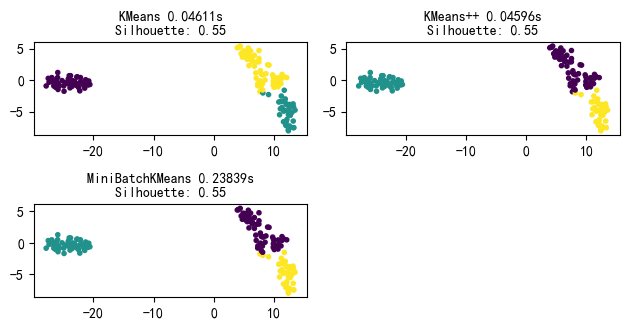

dataset=wine model=KMeans takeTime=0.04228 silhouette_score=0.57114
dataset=wine model=KMeans++ takeTime=0.04316 silhouette_score=0.57114
dataset=wine model=MiniBatchKMeans takeTime=0.11627 silhouette_score=0.57114


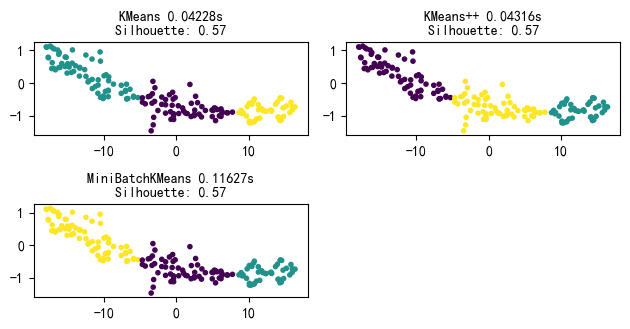

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris, load_digits, load_wine
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score  # 导入轮廓系数
import warnings

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 加载数据集 "digits": load_digits().data
allData = {"iris": load_iris().data, "wine": load_wine().data}
models = {"KMeans": KMeans, "KMeans++": KMeans, "MiniBatchKMeans": MiniBatchKMeans}

for dataName, value in allData.items():
    subplot_counter = 0
    n_clusters = 3
    if dataName == "wine":
        n_clusters = 3
    if dataName == "digits":
        n_clusters = 10

    # 降维
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(value)

    for modelName, model in models.items():
        startTime = time.time()
        if modelName == "KMeans++":
            init = "k-means++"
            model = model(n_clusters=n_clusters, init=init, n_init=10)
        else:
            model = model(n_clusters=n_clusters, n_init=10)
        labels = model.fit_predict(value)

        takeTime = time.time() - startTime
        # print("dataset=%s model=%s takeTime=%s" % (dataName, modelName, round(takeTime, 5)))
        silhouette_avg = silhouette_score(value, labels)  # 计算轮廓系数
        print("dataset=%s model=%s takeTime=%s silhouette_score=%s" % (dataName, modelName, round(takeTime, 5), round(silhouette_avg, 5)))

        subplot_counter += 1
        plt.subplot(3, 2, subplot_counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, marker='.')
        plt.title("%s %ss\nSilhouette: %.2f" % (modelName, round(takeTime, 5), silhouette_avg), fontsize=10)

    plt.tight_layout()
    # plt.savefig(dataName + ".png")
    plt.show()

dataset=iris model=KMeans takeTime=0.02917 silhouette_score=0.55282
dataset=iris model=KMeans++ takeTime=0.02901 silhouette_score=0.55282
dataset=iris model=MiniBatchKMeans takeTime=0.09014 silhouette_score=0.55282


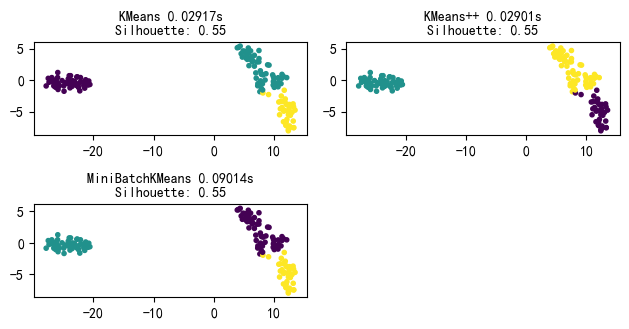

dataset=digits model=KMeans takeTime=0.11109 silhouette_score=0.18216
dataset=digits model=KMeans++ takeTime=0.109 silhouette_score=0.18242
dataset=digits model=MiniBatchKMeans takeTime=0.13226 silhouette_score=0.1864


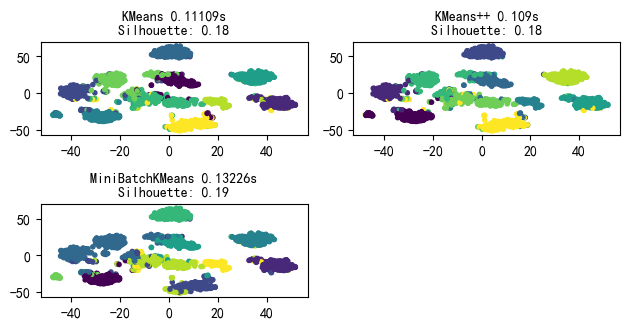

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris, load_digits
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score  # 导入轮廓系数
import warnings

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

allData = {"iris": load_iris().data, "digits": load_digits().data}
models = {"KMeans": KMeans, "KMeans++": KMeans, "MiniBatchKMeans": MiniBatchKMeans}

for dataName, value in allData.items():
    subplot_counter = 0
    n_clusters = 3
    if dataName == "digits":
        n_clusters = 10

    # 降维
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(value)

    for modelName, model in models.items():
        startTime = time.time()
        if modelName == "KMeans++":
            init = "k-means++"
            model = model(n_clusters=n_clusters, init=init, n_init=10)
        else:
            model = model(n_clusters=n_clusters, n_init=10)
        labels = model.fit_predict(value)

        takeTime = time.time() - startTime
        silhouette_avg = silhouette_score(value, labels)  # 计算轮廓系数
        print("dataset=%s model=%s takeTime=%s silhouette_score=%s" % (dataName, modelName, round(takeTime, 5), round(silhouette_avg, 5)))

        subplot_counter += 1
        plt.subplot(3, 2, subplot_counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, marker='.')
        plt.title("%s %ss\nSilhouette: %.2f" % (modelName, round(takeTime, 5), silhouette_avg), fontsize=10)

    plt.tight_layout()
    # plt.savefig(dataName + ".png")
    plt.show()

dataset=iris model=KMeans takeTime=0.04502 silhouette_score=0.55282
dataset=iris model=KMeans++ takeTime=0.04219 silhouette_score=0.55282
dataset=iris model=MiniBatchKMeans takeTime=0.09326 silhouette_score=0.52321


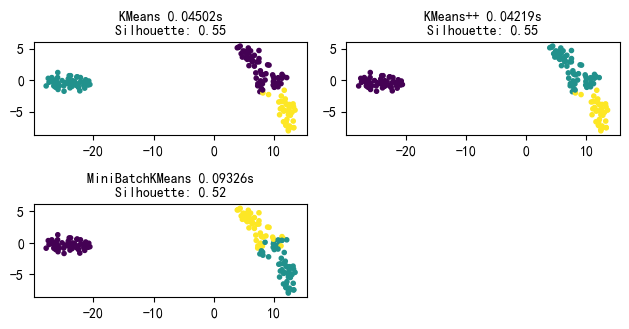

dataset=digits model=KMeans takeTime=0.14331 silhouette_score=0.1825
dataset=digits model=KMeans++ takeTime=0.13743 silhouette_score=0.18222
dataset=digits model=MiniBatchKMeans takeTime=0.31241 silhouette_score=0.17936


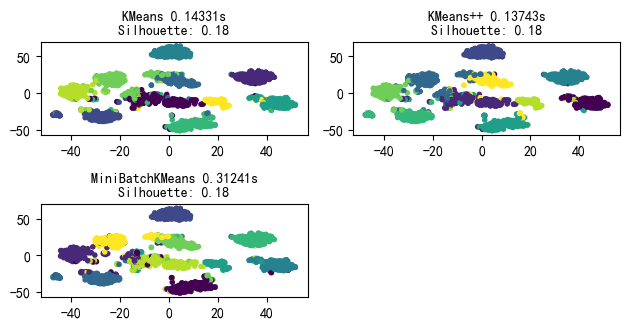

dataset=wine model=KMeans takeTime=0.04341 silhouette_score=0.57114
dataset=wine model=KMeans++ takeTime=0.04198 silhouette_score=0.57114
dataset=wine model=MiniBatchKMeans takeTime=0.09151 silhouette_score=0.54296


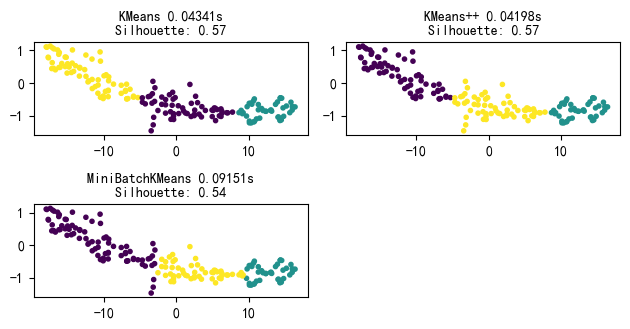

In [36]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# 在原代码中添加新的聚类算法
models = {
    "KMeans": KMeans,
    "KMeans++": KMeans,
    "MiniBatchKMeans": MiniBatchKMeans,
    "DBSCAN": DBSCAN,
    "AgglomerativeClustering": AgglomerativeClustering
}
allData = {"iris": load_iris().data, "digits": load_digits().data,"wine": load_wine().data}
models = {"KMeans": KMeans, "KMeans++": KMeans, "MiniBatchKMeans": MiniBatchKMeans}

for dataName, value in allData.items():
    subplot_counter = 0
    n_clusters = 3
    if dataName == "digits":
        n_clusters = 10

    # 降维
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(value)

    for modelName, model in models.items():
        startTime = time.time()
        if modelName == "KMeans++":
            init = "k-means++"
            model = model(n_clusters=n_clusters, init=init, n_init=10)
        elif modelName == "DBSCAN":
            model = model(eps=0.5, min_samples=5)  # 根据数据调整参数
        elif modelName == "AgglomerativeClustering":
            model = model(n_clusters=n_clusters)
        else:
            model = model(n_clusters=n_clusters, n_init=10)
        labels = model.fit_predict(value)

        takeTime = time.time() - startTime
        if hasattr(model, 'labels_'):
            silhouette_avg = silhouette_score(value, model.labels_)  # 计算轮廓系数
        else:
            silhouette_avg = 0  # 某些算法可能没有 labels_ 属性
        print("dataset=%s model=%s takeTime=%s silhouette_score=%s" % (dataName, modelName, round(takeTime, 5), round(silhouette_avg, 5)))

        subplot_counter += 1
        plt.subplot(len(models), 2, subplot_counter)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, marker='.')
        plt.title("%s %ss\nSilhouette: %.2f" % (modelName, round(takeTime, 5), silhouette_avg), fontsize=10)

    plt.tight_layout()
    # plt.savefig(dataName + ".png")
    plt.show()

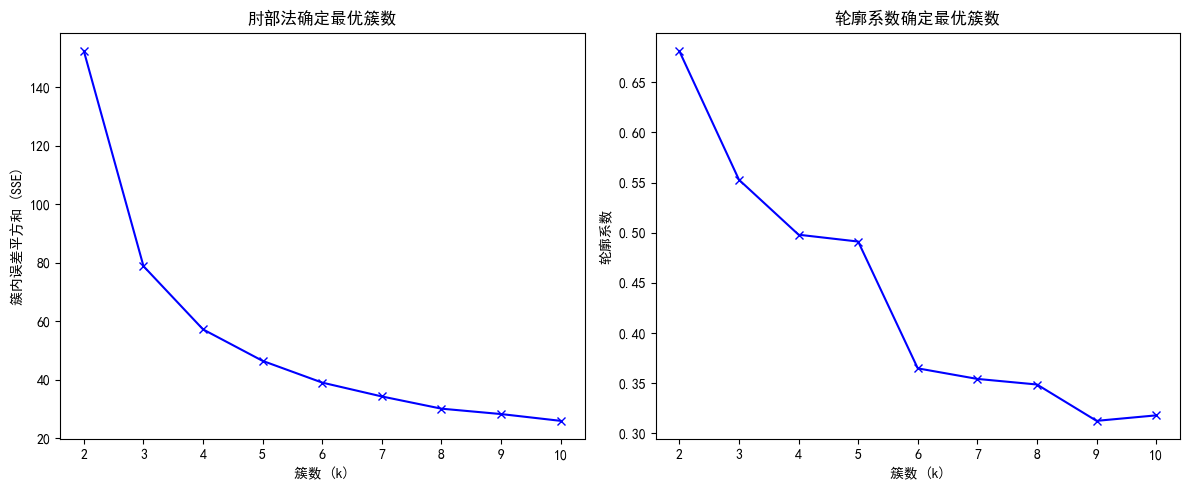

肘部法确定的最优簇数: 3
轮廓系数法确定的最优簇数: 2


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# 生成示例数据
iris = load_iris()
X = iris.data  # 使用全部4个特征
# 定义簇数范围
k_range = range(2, 11)

# 存储不同簇数下的 SSE 和轮廓系数
sse = []
silhouette_scores = []

# 遍历不同的簇数
for k in k_range:
    # 创建 KMeans 模型
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # 计算 SSE
    sse.append(kmeans.inertia_)
    
    # 计算轮廓系数
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# 使用肘部法确定最优簇数
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bx-')
plt.xlabel('簇数 (k)')
plt.ylabel('簇内误差平方和 (SSE)')
plt.title('肘部法确定最优簇数')

# 使用轮廓系数确定最优簇数
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('簇数 (k)')
plt.ylabel('轮廓系数')
plt.title('轮廓系数确定最优簇数')

plt.tight_layout()
plt.show()

# 找出最优簇数
best_k_elbow = k_range[np.argmin(np.diff(sse)) + 1]
best_k_silhouette = k_range[np.argmax(silhouette_scores)]

print(f"肘部法确定的最优簇数: {best_k_elbow}")
print(f"轮廓系数法确定的最优簇数: {best_k_silhouette}")

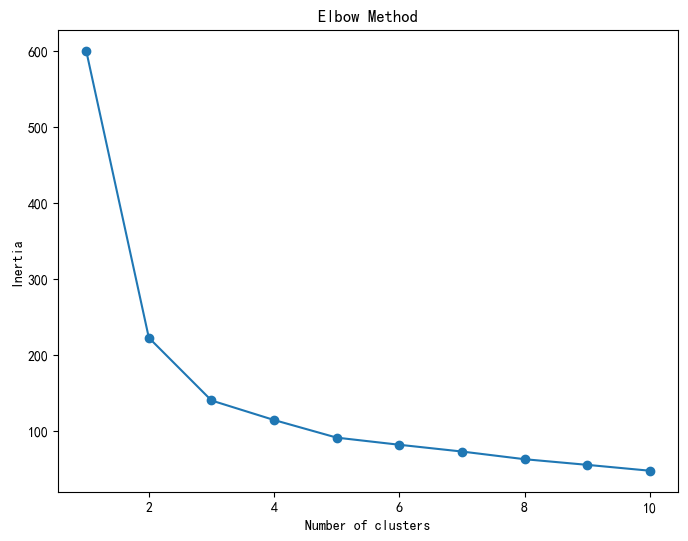

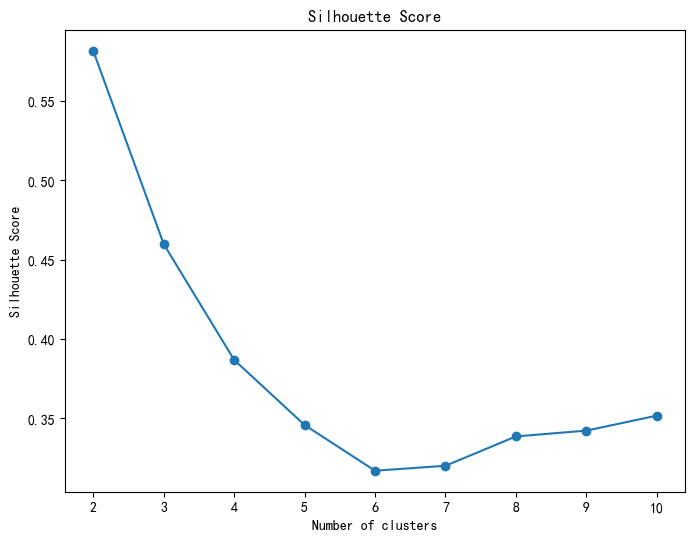

kmeans:Adjusted Rand Index 兰德(PCA): 0.6201351808870379
kmeans:Adjusted Rand Index 兰德(t-SNE): 0.6302367346938775
kmeans:Adjusted Rand Index 兰德(Raw Data): 0.6201351808870379
k-means++:Adjusted Rand Index 兰德(PCA): 0.6201351808870379
k-means++:Adjusted Rand Index 兰德(t-SNE): 0.6302367346938775
k-means++:Adjusted Rand Index 兰德(Raw Data): 0.6201351808870379
MiniBatchKMeans:Adjusted Rand Index 兰德(PCA): 0.6340646853502874
MiniBatchKMeans:Adjusted Rand Index 兰德(t-SNE): 0.6302367346938775
MiniBatchKMeans:Adjusted Rand Index 兰德(Raw Data): 0.6234541022500214
Normalized Mutual Information 互信息(PCA): 0.659486892724918
Normalized Mutual Information 互信息(t-SNE): 0.6655902882990271
Normalized Mutual Information 互信息(Raw Data): 0.659486892724918


C:\Users\Tiffany\AppData\Local\Temp\ipykernel_18636\3402036797.py:120: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_18636\3402036797.py:124: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(232)
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_18636\3402036797.py:128: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(233)


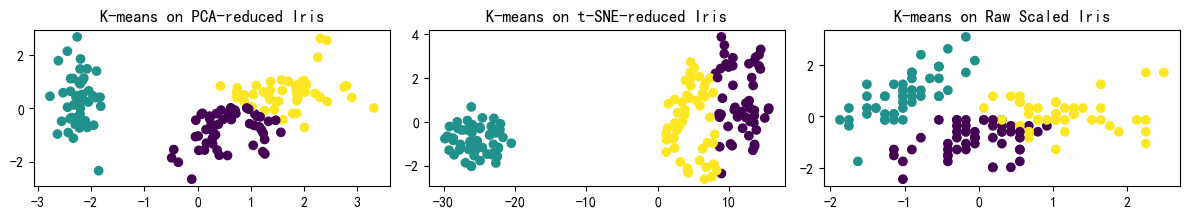

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载数据
data = load_iris()
X = data.data
y = data.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 肘部法确定最佳K值
inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 轮廓系数确定最佳K值
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 使用K-means进行聚类
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_pca = kmeans.fit_predict(X_pca)
clusters_tsne = kmeans.fit_predict(X_tsne)
clusters_raw = kmeans.fit_predict(X_scaled)
kmeans2=KMeans(n_clusters=k,init='k-means++',random_state=42)
clusters_pca2 = kmeans2.fit_predict(X_pca)
clusters_tsne2 = kmeans2.fit_predict(X_tsne)
clusters_raw2 = kmeans2.fit_predict(X_scaled)
mbkmeans = MiniBatchKMeans(n_clusters=3, batch_size=100, max_iter=100, init='k-means++', random_state=42)
clusters_pca3 = mbkmeans.fit_predict(X_pca)
clusters_tsne3 = mbkmeans.fit_predict(X_tsne)
clusters_raw3 = mbkmeans.fit_predict(X_scaled)

# 评估聚类效果（如果有真实标签）
# 这里使用鸢尾花的分类标签作为真实值
ari_pca = adjusted_rand_score(y, clusters_pca) # 兰德指数
ari_tsne = adjusted_rand_score(y, clusters_tsne)
ari_raw = adjusted_rand_score(y, clusters_raw)

ari_pca2 = adjusted_rand_score(y, clusters_pca2) # 兰德指数
ari_tsne2 = adjusted_rand_score(y, clusters_tsne2)
ari_raw2 = adjusted_rand_score(y, clusters_raw2)

ari_pca3 = adjusted_rand_score(y, clusters_pca3) # 兰德指数
ari_tsne3 = adjusted_rand_score(y, clusters_tsne3)
ari_raw3 = adjusted_rand_score(y, clusters_raw3)

nmi_pca = normalized_mutual_info_score(y, clusters_pca) #互信息
nmi_tsne = normalized_mutual_info_score(y, clusters_tsne)
nmi_raw = normalized_mutual_info_score(y, clusters_raw)

print(f"kmeans:Adjusted Rand Index 兰德(PCA): {ari_pca}") # 取值范围为 [−1,1]
print(f"kmeans:Adjusted Rand Index 兰德(t-SNE): {ari_tsne}")
print(f"kmeans:Adjusted Rand Index 兰德(Raw Data): {ari_raw}")
print(f"k-means++:Adjusted Rand Index 兰德(PCA): {ari_pca2}") # 取值范围为 [−1,1]
print(f"k-means++:Adjusted Rand Index 兰德(t-SNE): {ari_tsne2}")
print(f"k-means++:Adjusted Rand Index 兰德(Raw Data): {ari_raw2}")
print(f"MiniBatchKMeans:Adjusted Rand Index 兰德(PCA): {ari_pca3}") # 取值范围为 [−1,1]
print(f"MiniBatchKMeans:Adjusted Rand Index 兰德(t-SNE): {ari_tsne3}")
print(f"MiniBatchKMeans:Adjusted Rand Index 兰德(Raw Data): {ari_raw3}")

print(f"Normalized Mutual Information 互信息(PCA): {nmi_pca}") # 表示聚类结果与真实标签完全一致，共享信息量最大。 [0,1]
print(f"Normalized Mutual Information 互信息(t-SNE): {nmi_tsne}")
print(f"Normalized Mutual Information 互信息(Raw Data): {nmi_raw}")

# 可视化聚类结果
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('K-means on PCA-reduced Iris')

plt.subplot(132)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne, cmap='viridis')
plt.title('K-means on t-SNE-reduced Iris')

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_raw, cmap='viridis')
plt.title('K-means on Raw Scaled Iris')

plt.subplot(231)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca2, cmap='viridis')
plt.title('K-means on PCA-reduced Iris')

plt.subplot(232)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne2, cmap='viridis')
plt.title('K-means on t-SNE-reduced Iris')

plt.subplot(233)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_raw2, cmap='viridis')
plt.title('K-means on Raw Scaled Iris')



plt.tight_layout()
plt.show()